# Базовое знакомство с данными 

In [1]:
import pandas as pd
from math import *
import numpy as np
import seaborn as sns
import sklearn 


In [2]:
data = pd.read_csv('geo-reviews-dataset-2023.tskv',sep='\t',quoting=3)
data.head()

,"address=Екатеринбург, ул. Московская / ул. Волгоградская / ул. Печатников",name_ru=Московский квартал,rating=3.,rubrics=Жилой комплекс,"text=Московский квартал 2.\nШумно : летом по ночам дикие гонки. Грязно : кругом стройки, невозможно открыть окна (16 этаж! ), вечно по району летает мусор. Детские площадки убогие, на большой площади однотипные конструкции. Очень дорогая коммуналка. Часто срабатывает пожарная сигнализация. Жильцы уже не реагируют. В это время, обычно около часа, не работают лифты. Из плюсов - отличная планировка квартир ( Московская 194 ), на мой взгляд. Ремонт от застройщика на 3-. Окна вообще жуть - вместо вентиляции. По соотношению цена/качество - 3."
0,"address=Московская область, Электросталь, прос...",name_ru=Продукты Ермолино,rating=5.,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор..."
1,"address=Краснодар, Прикубанский внутригородско...",name_ru=LimeFit,rating=1.,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,..."
2,"address=Санкт-Петербург, проспект Энгельса, 11...",name_ru=Snow-Express,rating=4.,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...
3,"address=Тверь, Волоколамский проспект, 39",name_ru=Студия Beauty Brow,rating=5.,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...
4,"address=Иркутская область, Черемхово, Первомай...",name_ru=Tele2,rating=5.,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,..."


In [3]:
data.columns

Index(['address=Екатеринбург, ул. Московская / ул. Волгоградская / ул. Печатников',
       'name_ru=Московский квартал', 'rating=3.', 'rubrics=Жилой комплекс',
       'text=Московский квартал 2.\nШумно : летом по ночам дикие гонки. Грязно : кругом стройки, невозможно открыть окна (16 этаж! ), вечно по району летает мусор. Детские площадки убогие, на большой площади однотипные конструкции. Очень дорогая коммуналка. Часто срабатывает пожарная сигнализация. Жильцы уже не реагируют. В это время, обычно около часа, не работают лифты. Из плюсов - отличная планировка квартир ( Московская 194 ), на мой взгляд. Ремонт от застройщика на 3-. Окна вообще жуть - вместо вентиляции. По соотношению цена/качество - 3.'],
      dtype='object')

In [4]:
data.columns=['address','name','rating','rubrics','text']
data.head()

,address,name,rating,rubrics,text
0,"address=Московская область, Электросталь, прос...",name_ru=Продукты Ермолино,rating=5.,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор..."
1,"address=Краснодар, Прикубанский внутригородско...",name_ru=LimeFit,rating=1.,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,..."
2,"address=Санкт-Петербург, проспект Энгельса, 11...",name_ru=Snow-Express,rating=4.,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...
3,"address=Тверь, Волоколамский проспект, 39",name_ru=Студия Beauty Brow,rating=5.,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...
4,"address=Иркутская область, Черемхово, Первомай...",name_ru=Tele2,rating=5.,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,..."


In [5]:
data['address'][0].split('=')[1].split(',')[0]

'Московская область'

# Переделаем все фичи под свои нужды

In [6]:
def clean_address(address):

    address_list=address.split('=')
    real_address = address_list[1].split(',')[0]
    return real_address

clean_address=data['address'].apply(clean_address)
clean_address.value_counts()

Москва                                         104774
Санкт-Петербург                                 52568
Московская область                              49953
Краснодарский край                              29646
Республика Татарстан                            11662
                                                ...  
городской округ Луховицы Московская область         1
паромная переправа Оханск - Юго-Камский             1
А-159                                               1
Татарский пролив                                    1
Окситания                                           1
Name: address, Length: 467, dtype: int64

In [7]:
data['Address']=clean_address
data=data.drop(columns='address')
data.head()

,name,rating,rubrics,text,Address
0,name_ru=Продукты Ермолино,rating=5.,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор...",Московская область
1,name_ru=LimeFit,rating=1.,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,...",Краснодар
2,name_ru=Snow-Express,rating=4.,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...,Санкт-Петербург
3,name_ru=Студия Beauty Brow,rating=5.,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...,Тверь
4,name_ru=Tele2,rating=5.,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,...",Иркутская область


In [8]:
def clean_name(name):
    name_list=name.split('=')
    real_name = name_list[1]
    return real_name
clean_name=data['name'].apply(clean_name)
clean_name.value_counts()

Пятёрочка                                 6030
Магнит                                    2611
Красное&Белое                             1732
Wildberries                               1698
Ozon                                      1494
                                          ... 
Клиника доктора Гурбанзаде                   1
Сити Прачка                                  1
Магазин при пивоварне Barbarus Brewery       1
Прайм Карбон                                 1
Ярославское шоссе, 54                        1
Name: name, Length: 148458, dtype: int64

In [9]:
data['Name']=clean_name
data=data.drop(columns='name')
data.head()

,rating,rubrics,text,Address,Name
0,rating=5.,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор...",Московская область,Продукты Ермолино
1,rating=1.,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,...",Краснодар,LimeFit
2,rating=4.,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...,Санкт-Петербург,Snow-Express
3,rating=5.,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...,Тверь,Студия Beauty Brow
4,rating=5.,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,...",Иркутская область,Tele2


In [10]:
data[(data['rating']!='rating=5.') & (data['rating']!='rating=4.')
      & (data['rating']!='rating=3.') & (data['rating']!='rating=2.') & (data['rating']!='rating=1.') & (data['rating']!='rating=0.')]

,rating,rubrics,text,Address,Name
321,rubrics=Офис организации,text=Ребята профи!\n\nОтлично подобрали модель...,NaN,Москва,5.
5715,rubrics=Гостиница,"text=Гостиница действительно хорошая, удобно р...",NaN,Челябинская область,5.
5716,rubrics=Гостиница,text=Был здесь на кулинарном мастер-классе. Ме...,NaN,Челябинская область,5.
5717,rubrics=Гостиница,"text=Тихое место, в выходные возможно и шумно ...",NaN,Челябинская область,5.
5718,rubrics=Гостиница,"text=Воспитанные и отзывчивые официанты , вкус...",NaN,Челябинская область,5.
...,...,...,...,...,...
498535,"rubrics=Скалодром;Спортивный клуб, секция",text=Были с детьми на 8 марта. Приехали специа...,NaN,Республика Башкортостан,5.
498687,rubrics=Изготовление памятников и надгробий;Из...,"text=Отличное качество материала, прекрасное и...",NaN,Москва,5.
498912,rubrics=Магазин цветов;Копировальный центр;Тов...,text=Цен на цветы которые находятся на витрине...,NaN,Самарская область,1.
499005,rubrics=Салон красоты,text=Квалифицированные мастера. Работу выполня...,NaN,Волгоград,5.


In [11]:
data[data['text'].isnull()]

,rating,rubrics,text,Address,Name
321,rubrics=Офис организации,text=Ребята профи!\n\nОтлично подобрали модель...,NaN,Москва,5.
5715,rubrics=Гостиница,"text=Гостиница действительно хорошая, удобно р...",NaN,Челябинская область,5.
5716,rubrics=Гостиница,text=Был здесь на кулинарном мастер-классе. Ме...,NaN,Челябинская область,5.
5717,rubrics=Гостиница,"text=Тихое место, в выходные возможно и шумно ...",NaN,Челябинская область,5.
5718,rubrics=Гостиница,"text=Воспитанные и отзывчивые официанты , вкус...",NaN,Челябинская область,5.
...,...,...,...,...,...
498535,"rubrics=Скалодром;Спортивный клуб, секция",text=Были с детьми на 8 марта. Приехали специа...,NaN,Республика Башкортостан,5.
498687,rubrics=Изготовление памятников и надгробий;Из...,"text=Отличное качество материала, прекрасное и...",NaN,Москва,5.
498912,rubrics=Магазин цветов;Копировальный центр;Тов...,text=Цен на цветы которые находятся на витрине...,NaN,Самарская область,1.
499005,rubrics=Салон красоты,text=Квалифицированные мастера. Работу выполня...,NaN,Волгоград,5.


В общем и целом, кто-то побаловался с данными и 970 строк некорректно составлены, просто кикнем их))

In [12]:
data=data.dropna()
data.isnull().value_counts()

rating  rubrics  text   Address  Name 
False   False    False  False    False    499029
dtype: int64

In [13]:
def clean_num(rating):
    rating_list=rating.split('=')
    real_rating = int(float(rating_list[1]))
    if real_rating==0:
        real_rating=1
    return real_rating
clean_name=data['rating'].apply(clean_num)
clean_name.value_counts()

5    389693
4     41116
1     34498
3     21651
2     12071
Name: rating, dtype: int64

In [14]:
data['Rating']=clean_name
data=data.drop(columns='rating')
data.head()

,rubrics,text,Address,Name,Rating
0,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор...",Московская область,Продукты Ермолино,5
1,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,...",Краснодар,LimeFit,1
2,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...,Санкт-Петербург,Snow-Express,4
3,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...,Тверь,Студия Beauty Brow,5
4,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,...",Иркутская область,Tele2,5


In [15]:
data['rubrics'][0].split('=')[1].split(';')

['Магазин продуктов', 'Продукты глубокой заморозки', 'Магазин мяса, колбас']

In [16]:
def clean_rub(rubrics):
    rub_list=rubrics.split('=')
    real_rub = rub_list[1].split(';')[0]
    return str(real_rub)
clean_rub=data['rubrics'].apply(clean_rub)
clean_rub.value_counts()

Гостиница                42630
Ресторан                 39726
Кафе                     31209
Супермаркет              14382
Салон красоты            11861
                         ...  
Продуктовый автомат          1
Ремонт автоэлектрики         1
Контейнерный терминал        1
Ремонт оружия                1
Велотрек, велодром           1
Name: rubrics, Length: 1253, dtype: int64

In [17]:
data['Rubrics']=clean_rub
data=data.drop(columns='rubrics')
data.head()

,text,Address,Name,Rating,Rubrics
0,"text=Замечательная сеть магазинов в общем, хор...",Московская область,Продукты Ермолино,5,Магазин продуктов
1,"text=Не знаю смутят ли кого-то данные правила,...",Краснодар,LimeFit,1,Фитнес-клуб
2,text=Хорошие условия аренды. \nДружелюбный пер...,Санкт-Петербург,Snow-Express,4,Пункт проката
3,text=Топ мастер Ангелина топ во всех смыслах )...,Тверь,Студия Beauty Brow,5,Салон красоты
4,"text=Приятное общение, все доступно объяснили,...",Иркутская область,Tele2,5,Оператор сотовой связи


In [18]:
def clean_text(text):
    txt_list=text.split('=')
    real_txt = txt_list[1].replace('\n',' ')
    return real_txt
clean_txt=data['text'].apply(clean_text)
data['Text']=clean_txt
data=data.drop(columns='text')
data.head()

,Address,Name,Rating,Rubrics,Text
0,Московская область,Продукты Ермолино,5,Магазин продуктов,"Замечательная сеть магазинов в общем, хороший ..."
1,Краснодар,LimeFit,1,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
2,Санкт-Петербург,Snow-Express,4,Пункт проката,Хорошие условия аренды. \nДружелюбный персонал...
3,Тверь,Студия Beauty Brow,5,Салон красоты,Топ мастер Ангелина топ во всех смыслах ) Немн...
4,Иркутская область,Tele2,5,Оператор сотовой связи,"Приятное общение, все доступно объяснили, мне ..."


# Немного порисуем

<AxesSubplot: xlabel='Rating', ylabel='Name'>

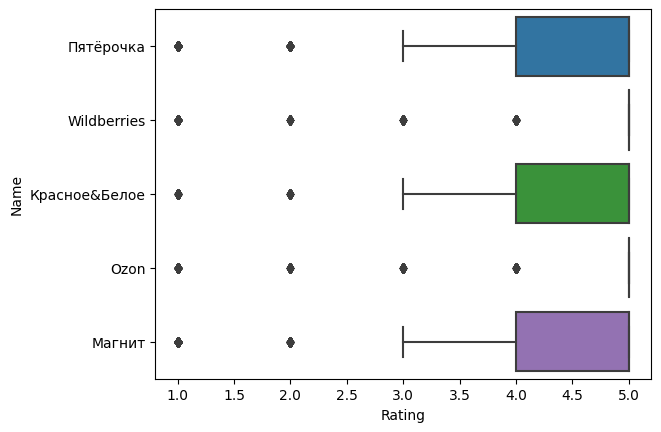

In [19]:
top_5_famous=['Пятёрочка','Магнит','Красное&Белое','Wildberries','Ozon' ]
data_top_5_fam=data[(data['Name']==top_5_famous[0])|(data['Name']==top_5_famous[1])|(data['Name']==top_5_famous[2])|(data['Name']==top_5_famous[3])|(data['Name']==top_5_famous[4])]
sns.boxplot(data=data_top_5_fam,y='Name',x='Rating',orient='h')

In [20]:
data.groupby('Name')['Rating'].agg('mean').sort_values(ascending=False)

Name
К8Детейлинг                  5.0
Маленькое чудо               5.0
Малиновая гора               5.0
Малинники                    5.0
Малинки отель                5.0
                            ... 
Сибирский спортивный клуб    1.0
Бизнес Помощник              1.0
Ханака                       1.0
Клин Эксперт                 1.0
Горячее питание              1.0
Name: Rating, Length: 148453, dtype: float64

In [21]:
data[data['Rubrics']=='Гостиница']

,Address,Name,Rating,Rubrics,Text
15,Алтайский край,Бирюзовая Катунь,5,Гостиница,Очень крутые экскурсии. Обязательно приедем ещ...
47,Севастополь,Баунти,5,Гостиница,"Понравилось все! Гостеприимство, чистота, спок..."
76,Свердловская область,Парк Отель,5,Гостиница,"Моментальное бронирование, быстрая регистрация..."
104,Ростов-на-Дону,Меридиан,5,Гостиница,Хорошей отель. Девушка на ресепшен очень добро...
105,Ростов-на-Дону,Меридиан,5,Гостиница,Гостиница понравилась. Отличное сочетание цены...
...,...,...,...,...,...
499955,Тула,AZIMUT Сити Отель Тула,5,Гостиница,"Отличный отель, есть все необходимое. Халат, з..."
499956,Тула,AZIMUT Сити Отель Тула,4,Гостиница,"Красиво, всё новое, хорошие номера. Минусы: пл..."
499957,Тула,AZIMUT Сити Отель Тула,5,Гостиница,В отеле остановились по дороге домой из Москвы...
499958,Тула,AZIMUT Сити Отель Тула,4,Гостиница,4 только из-за того что по утрам нет горячей в...


<AxesSubplot: xlabel='Rating', ylabel='Rubrics'>

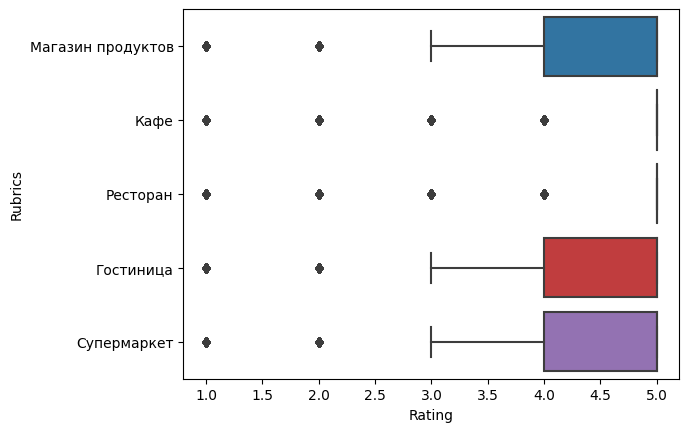

In [22]:
top_5_cat=['Гостиница','Ресторан','Кафе','Супермаркет','Магазин продуктов']
data_top_5_cat=data[(data['Rubrics']==top_5_cat[0])|(data['Rubrics']==top_5_cat[1])|(data['Rubrics']==top_5_cat[2])|(data['Rubrics']==top_5_cat[3])|(data['Rubrics']==top_5_cat[4])]
sns.boxplot(data=data_top_5_cat,y='Rubrics',x='Rating',orient='h')

# Creating a Train data 

In [23]:
first_df=data[['Rating','Text']]
first_df

,Rating,Text
0,5,"Замечательная сеть магазинов в общем, хороший ..."
1,1,"Не знаю смутят ли кого-то данные правила, но я..."
2,4,Хорошие условия аренды. \nДружелюбный персонал...
3,5,Топ мастер Ангелина топ во всех смыслах ) Немн...
4,5,"Приятное общение, все доступно объяснили, мне ..."
...,...,...
499993,5,Хороший способ избежать автобусной пытки. Элек...
499994,4,"Охрана кривая но добрая, двери не закрываются ..."
499995,4,По сравнению со многими современными платформа...
499997,5,Был с семьёй 13.06.23 Отличное место. Рекоменд...


<AxesSubplot: xlabel='Rating', ylabel='count'>

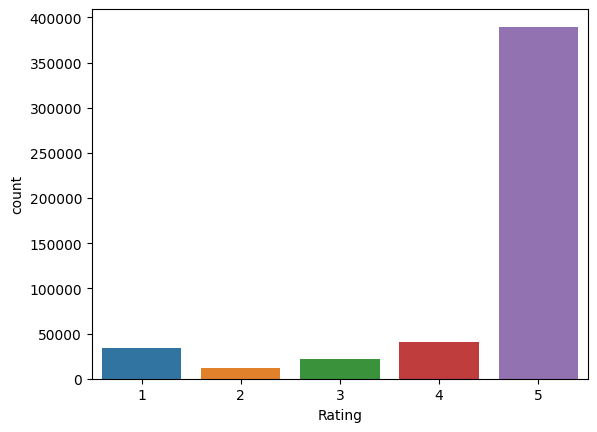

In [24]:
sns.countplot(first_df,x='Rating')

In [25]:
first_df['Rating'].value_counts()

5    389693
4     41116
1     34498
3     21651
2     12071
Name: Rating, dtype: int64

# Making classes balanced

In [26]:
count_class_5, count_class_4,count_class_1,count_class_3,count_class_2 = first_df['Rating'].value_counts()

df_class_1 = first_df[first_df['Rating'] == 1]
df_class_2 = first_df[first_df['Rating'] == 2]
df_class_3 = first_df[first_df['Rating'] == 3]
df_class_4 = first_df[first_df['Rating'] == 4]
df_class_5 = first_df[first_df['Rating'] == 5]

In [27]:
df_class_1_under = df_class_1.sample(count_class_2)
df_class_3_under = df_class_3.sample(count_class_2)
df_class_4_under = df_class_4.sample(count_class_2)
df_class_5_under = df_class_5.sample(count_class_2)
df_test_under = pd.concat([df_class_1_under.reset_index(drop=True),df_class_3_under.reset_index(drop=True),df_class_4_under.reset_index(drop=True),df_class_5_under.reset_index(drop=True), df_class_2.reset_index(drop=True)], axis=0)

print('Random under-sampling:')
print(df_test_under['Rating'].value_counts())

Random under-sampling:
1    12071
3    12071
4    12071
5    12071
2    12071
Name: Rating, dtype: int64


# TEXT Preprocessing & Vectorizing

In [28]:
import pandas as pd
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [29]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\BAZA
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\BAZA
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
def preprocess(text, stop_words, punctuation_marks, morph):
    tokens = word_tokenize(text.lower())
    preprocessed_text = []
    for token in tokens:
        if token not in punctuation_marks:
            lemma = morph.parse(token)[0].normal_form
            if lemma not in stop_words:
                preprocessed_text.append(lemma)
    return preprocessed_text

In [31]:
punctuation_marks = ['!', ',', '(', ')', ':', '-', '?', '.', '..', '...']
stop_words = stopwords.words("russian")
morph = pymorphy2.MorphAnalyzer()

In [32]:
df_test_under['Preprocessed_texts'] = df_test_under.apply(lambda row: preprocess(row['Text'], punctuation_marks, stop_words, morph), axis=1)

In [33]:
df_test_under

,Rating,Text,Preprocessed_texts
0,1,Был однажды здесь несколько лет назад. Сильно ...,"[однажды, несколько, год, назад, сильно, отпуг..."
1,1,"Хотели купить бассейн, оплатили, на сайте Мега...","[хотеть, купить, бассейн, оплатить, сайт, мега..."
2,1,Вообще бы не одной звезды не поставила. \nВ об...,"[вообще, один, звезда, поставить, \nв, общий, ..."
3,1,Здравствуйте! Были в заведении на Кузнецком мо...,"[здравствуйте, заведение, кузнецкий, мост, сло..."
4,1,Выбрала помаду Dior за 3600 рублей подруге в п...,"[выбрать, помада, dior, 3600, рубль, подруга, ..."
...,...,...,...
12066,2,"Очереди часто , алкоголь так вообще поленый , ...","[очередь, часто, алкоголь, вообще, полёный, хл..."
12067,2,Сегодня были в столовой при кафе. \nНа 4 челов...,"[сегодня, столовая, кафе, \nич, 4, человек, 19..."
12068,2,Брала торт на ДР ребенка. Очень долго до этого...,"[брать, торт, др, ребёнок, очень, долго, наблю..."
12069,2,Ассортимент очень маленький. Территория не уби...,"[ассортимент, очень, маленький, территория, уб..."


In [34]:
import wget

In [35]:
wget.download('https://storage.yandexcloud.net/natasha-navec/packs/navec_hudlit_v1_12B_500K_300d_100q.tar')

'navec_hudlit_v1_12B_500K_300d_100q (2).tar'

In [36]:
from navec import Navec

In [37]:
navec = Navec.load('navec_hudlit_v1_12B_500K_300d_100q.tar')

In [38]:
random_state = 42
max_review_len = 100
vector_size = 300

In [39]:
def vectorize_text(txt, navec, max_review_len):
    unk = navec['<unk>']
    text_embeddings = []
    for tocken in txt:
        embedding = navec.get(tocken, unk)
        text_embeddings.append(embedding)
    # Дополняем или обрезаем отзывы для фиксированной длины max_review_len
    l = len(text_embeddings)
    if l > max_review_len:
        text_embeddings = text_embeddings[:max_review_len]
    else:
        text_embeddings.extend([navec['<pad>']] * (max_review_len - l))
    return text_embeddings

In [40]:
df_test_under['Embeddings'] = df_test_under.apply(lambda row: vectorize_text(row['Preprocessed_texts'], navec, max_review_len), axis=1)

In [41]:
df_test_under

,Rating,Text,Preprocessed_texts,Embeddings
0,1,Был однажды здесь несколько лет назад. Сильно ...,"[однажды, несколько, год, назад, сильно, отпуг...","[[-0.20558196, -0.5172327, -0.11967026, 0.2329..."
1,1,"Хотели купить бассейн, оплатили, на сайте Мега...","[хотеть, купить, бассейн, оплатить, сайт, мега...","[[-0.17414474, 0.42308596, 0.39629254, -0.1173..."
2,1,Вообще бы не одной звезды не поставила. \nВ об...,"[вообще, один, звезда, поставить, \nв, общий, ...","[[-0.20394225, -0.5428032, 0.17268088, 0.07550..."
3,1,Здравствуйте! Были в заведении на Кузнецком мо...,"[здравствуйте, заведение, кузнецкий, мост, сло...","[[0.21431214, 0.37028718, 0.13679631, 0.126034..."
4,1,Выбрала помаду Dior за 3600 рублей подруге в п...,"[выбрать, помада, dior, 3600, рубль, подруга, ...","[[0.1683296, -0.4029474, -0.67731494, 0.303906..."
...,...,...,...,...
12066,2,"Очереди часто , алкоголь так вообще поленый , ...","[очередь, часто, алкоголь, вообще, полёный, хл...","[[-0.34724313, -0.14704202, -0.4983434, -0.032..."
12067,2,Сегодня были в столовой при кафе. \nНа 4 челов...,"[сегодня, столовая, кафе, \nич, 4, человек, 19...","[[0.05624003, -0.4158787, -0.039217323, 0.3650..."
12068,2,Брала торт на ДР ребенка. Очень долго до этого...,"[брать, торт, др, ребёнок, очень, долго, наблю...","[[-0.2938254, -0.2968786, -0.025342526, 0.3093..."
12069,2,Ассортимент очень маленький. Территория не уби...,"[ассортимент, очень, маленький, территория, уб...","[[0.32431203, -0.4076073, 0.03718196, 0.148712..."


In [42]:
def simple_text(text):
    stroka=''
    for i in range(len(text)):
        stroka=stroka +text[i]+' '
    return stroka

s1mple=df_test_under['Preprocessed_texts'].apply(simple_text)
s1mple

0        однажды несколько год назад сильно отпугнуть н...
1        хотеть купить бассейн оплатить сайт мегастрой ...
2        вообще один звезда поставить \nв общий история...
3        здравствуйте заведение кузнецкий мост сложитьс...
4        выбрать помада dior 3600 рубль подруга подарок...
                               ...                        
12066    очередь часто алкоголь вообще полёный хлеб пос...
12067    сегодня столовая кафе \nич 4 человек 1900р\nсу...
12068    брать торт др ребёнок очень долго наблюдать да...
12069    ассортимент очень маленький территория убирать...
12070    5600 вкрутить болт дисплей 🤦🏻‍♂️\n изначально ...
Name: Preprocessed_texts, Length: 60355, dtype: object

In [43]:
df_test_under['Simple_Text']=s1mple
df_test_under

,Rating,Text,Preprocessed_texts,Embeddings,Simple_Text
0,1,Был однажды здесь несколько лет назад. Сильно ...,"[однажды, несколько, год, назад, сильно, отпуг...","[[-0.20558196, -0.5172327, -0.11967026, 0.2329...",однажды несколько год назад сильно отпугнуть н...
1,1,"Хотели купить бассейн, оплатили, на сайте Мега...","[хотеть, купить, бассейн, оплатить, сайт, мега...","[[-0.17414474, 0.42308596, 0.39629254, -0.1173...",хотеть купить бассейн оплатить сайт мегастрой ...
2,1,Вообще бы не одной звезды не поставила. \nВ об...,"[вообще, один, звезда, поставить, \nв, общий, ...","[[-0.20394225, -0.5428032, 0.17268088, 0.07550...",вообще один звезда поставить \nв общий история...
3,1,Здравствуйте! Были в заведении на Кузнецком мо...,"[здравствуйте, заведение, кузнецкий, мост, сло...","[[0.21431214, 0.37028718, 0.13679631, 0.126034...",здравствуйте заведение кузнецкий мост сложитьс...
4,1,Выбрала помаду Dior за 3600 рублей подруге в п...,"[выбрать, помада, dior, 3600, рубль, подруга, ...","[[0.1683296, -0.4029474, -0.67731494, 0.303906...",выбрать помада dior 3600 рубль подруга подарок...
...,...,...,...,...,...
12066,2,"Очереди часто , алкоголь так вообще поленый , ...","[очередь, часто, алкоголь, вообще, полёный, хл...","[[-0.34724313, -0.14704202, -0.4983434, -0.032...",очередь часто алкоголь вообще полёный хлеб пос...
12067,2,Сегодня были в столовой при кафе. \nНа 4 челов...,"[сегодня, столовая, кафе, \nич, 4, человек, 19...","[[0.05624003, -0.4158787, -0.039217323, 0.3650...",сегодня столовая кафе \nич 4 человек 1900р\nсу...
12068,2,Брала торт на ДР ребенка. Очень долго до этого...,"[брать, торт, др, ребёнок, очень, долго, наблю...","[[-0.2938254, -0.2968786, -0.025342526, 0.3093...",брать торт др ребёнок очень долго наблюдать да...
12069,2,Ассортимент очень маленький. Территория не уби...,"[ассортимент, очень, маленький, территория, уб...","[[0.32431203, -0.4076073, 0.03718196, 0.148712...",ассортимент очень маленький территория убирать...


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
X_NEW=df_test_under['Simple_Text']
y_new=df_test_under['Rating']

In [45]:
#X_bad=df_test_under['Text']
#X_train_bad, X_test_bad, y_train_bad, y_test_bad = train_test_split(X_bad, y_new, test_size=0.25, random_state=42,stratify=y_new)
'''tfidf=TfidfVectorizer()
tfidf.fit(X_train_bad)
X_TRAIN_TFIDF_BAD=tfidf.transform(X_train_bad)
X_TEST_TFIDF_BAD=tfidf.transform(X_test_bad)
X_TRAIN_TFIDF_BAD'''

'tfidf=TfidfVectorizer()\ntfidf.fit(X_train_bad)\nX_TRAIN_TFIDF_BAD=tfidf.transform(X_train_bad)\nX_TEST_TFIDF_BAD=tfidf.transform(X_test_bad)\nX_TRAIN_TFIDF_BAD'

In [46]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_NEW, y_new, test_size=0.25, random_state=42,stratify=y_new)

In [47]:
tfidf=TfidfVectorizer()
tfidf.fit(X_train_new)
X_TRAIN_TFIDF_NEW=tfidf.transform(X_train_new)
X_TEST_TFIDF_NEW=tfidf.transform(X_test_new)
X_TRAIN_TFIDF_NEW

<45266x72785 sparse matrix of type '<class 'numpy.float64'>'
	with 1656137 stored elements in Compressed Sparse Row format>

In [48]:
X=np.array(df_test_under['Embeddings'].tolist()).reshape(len(df_test_under), vector_size * max_review_len)
y=df_test_under['Rating']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)
X_train.shape


(45266, 30000)

# Я сказала стартуем!

In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_TRAIN_TFIDF_NEW, y_train_new)

DecisionTreeClassifier()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_TRAIN_TFIDF_NEW,y_train_new)

MultinomialNB()

In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_TRAIN_TFIDF_NEW,y_train_new)

C:\Users\BAZA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 30, metric = 'euclidean')
KNC.fit(X_TRAIN_TFIDF_NEW,y_train_new)

KNeighborsClassifier(metric='euclidean', n_neighbors=30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=80)
RFC.fit(X_TRAIN_TFIDF_NEW,y_train_new)

RandomForestClassifier(n_estimators=80)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=85)
GBC.fit(X_TRAIN_TFIDF_NEW,y_train_new)

GradientBoostingClassifier(n_estimators=85)

# На оценку

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
def report(model):
    preds = model.predict(X_TEST_TFIDF_NEW)
    print(classification_report(y_test_new,preds))
    ConfusionMatrixDisplay.from_estimator(model,X_TEST_TFIDF_NEW,y_test_new)

MNB
              precision    recall  f1-score   support

           1       0.53      0.64      0.58      3018
           2       0.36      0.37      0.37      3017
           3       0.38      0.28      0.32      3018
           4       0.48      0.55      0.51      3018
           5       0.78      0.68      0.73      3018

    accuracy                           0.51     15089
   macro avg       0.51      0.51      0.50     15089
weighted avg       0.51      0.51      0.50     15089



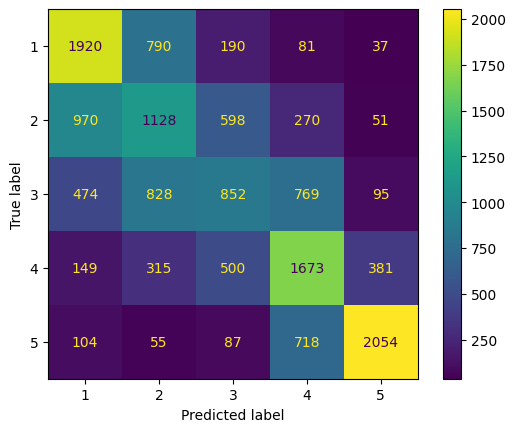

In [ ]:
print("MNB")
report(MNB)

DTC
              precision    recall  f1-score   support

           1       0.44      0.45      0.44      3018
           2       0.29      0.26      0.27      3017
           3       0.26      0.27      0.26      3018
           4       0.35      0.36      0.35      3018
           5       0.52      0.52      0.52      3018

    accuracy                           0.37     15089
   macro avg       0.37      0.37      0.37     15089
weighted avg       0.37      0.37      0.37     15089



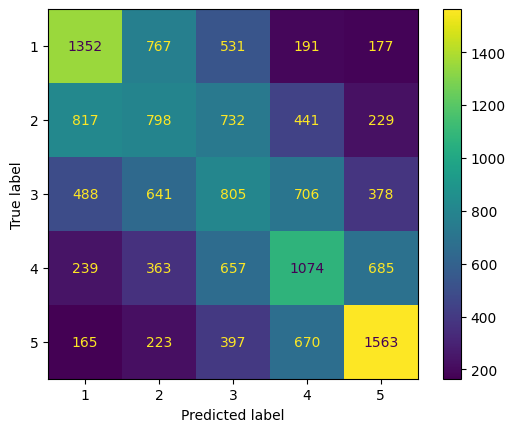

In [ ]:
print("DTC")
report(dtc)

KNC
              precision    recall  f1-score   support

           1       0.50      0.54      0.52      3018
           2       0.37      0.24      0.29      3017
           3       0.33      0.22      0.26      3018
           4       0.36      0.37      0.37      3018
           5       0.49      0.79      0.60      3018

    accuracy                           0.43     15089
   macro avg       0.41      0.43      0.41     15089
weighted avg       0.41      0.43      0.41     15089



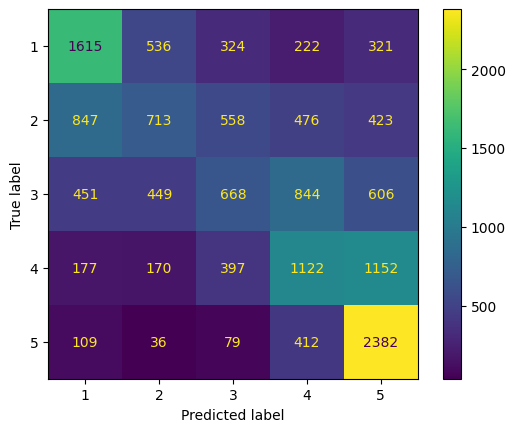

In [ ]:
# K=30 metric = euclidean
print("KNC")
report(KNC)

SVC
              precision    recall  f1-score   support

           1       0.55      0.63      0.59      3018
           2       0.36      0.32      0.34      3017
           3       0.36      0.31      0.33      3018
           4       0.47      0.48      0.48      3018
           5       0.70      0.78      0.74      3018

    accuracy                           0.50     15089
   macro avg       0.49      0.50      0.49     15089
weighted avg       0.49      0.50      0.49     15089



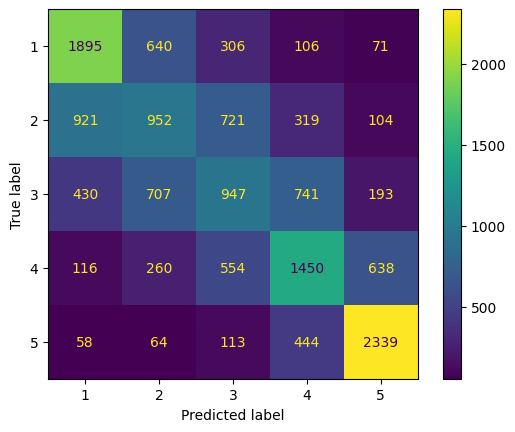

In [ ]:
print('SVC')
report(svc)

RFC
              precision    recall  f1-score   support

           1       0.49      0.71      0.58      3018
           2       0.35      0.24      0.29      3017
           3       0.36      0.23      0.28      3018
           4       0.46      0.46      0.46      3018
           5       0.63      0.77      0.69      3018

    accuracy                           0.48     15089
   macro avg       0.46      0.48      0.46     15089
weighted avg       0.46      0.48      0.46     15089



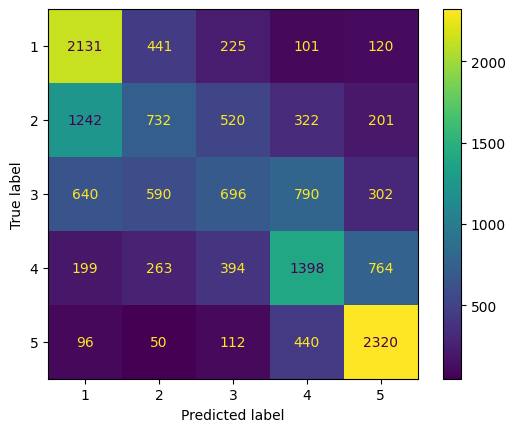

In [ ]:
print('RFC')
report(RFC)

GBC
              precision    recall  f1-score   support

           1       0.55      0.58      0.57      3018
           2       0.36      0.30      0.33      3017
           3       0.31      0.33      0.32      3018
           4       0.44      0.46      0.45      3018
           5       0.63      0.66      0.65      3018

    accuracy                           0.47     15089
   macro avg       0.46      0.47      0.46     15089
weighted avg       0.46      0.47      0.46     15089



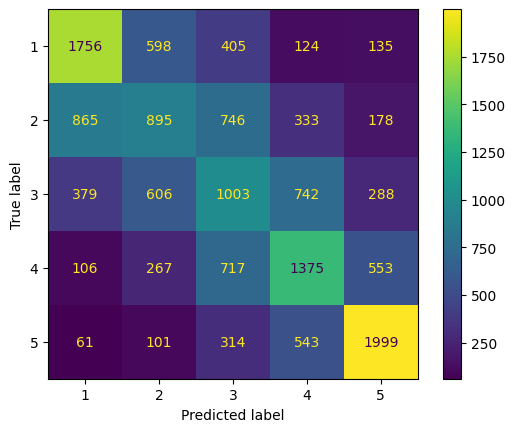

In [ ]:
print('GBC')
report(GBC)

# НЕЙРОНКИ МОГУТ?

In [ ]:
#%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Максимальное количество слов 
num_words = 100000
# Максимальная длина новости
max_news_len = 40
# Количество классов новостей
nb_classes = 5

In [ ]:
from sklearn.model_selection import train_test_split
X_NEW=df_test_under['Simple_Text']
y_new=df_test_under['Rating']

In [ ]:
y_train=utils.to_categorical(y_new-1,nb_classes)

In [ ]:
y_train

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_NEW, y_train, test_size=0.25, random_state=42,stratify=y_new)

In [ ]:
tokenizer=Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_NEW)

In [ ]:
tokenizer.word_index

{'очень': 1,
 'это': 2,
 'n': 3,
 'хороший': 4,
 'место': 5,
 'который': 6,
 'магазин': 7,
 'цена': 8,
 'номер': 9,
 'персонал': 10,
 'день': 11,
 'такой': 12,
 'просто': 13,
 'ребёнок': 14,
 'сказать': 15,
 'время': 16,
 'человек': 17,
 'всё': 18,
 "''": 19,
 'свой': 20,
 'один': 21,
 'то': 22,
 'работать': 23,
 'вкусный': 24,
 'весь': 25,
 '2': 26,
 'сделать': 27,
 'сам': 28,
 'еда': 29,
 'другой': 30,
 'год': 31,
 'заказ': 32,
 'большой': 33,
 'ещё': 34,
 'минута': 35,
 'товар': 36,
 'заведение': 37,
 'мочь': 38,
 'первый': 39,
 'понравиться': 40,
 'хотеть': 41,
 'вообще': 42,
 'мы': 43,
 'час': 44,
 'работа': 45,
 'блюдо': 46,
 '5': 47,
 'качество': 48,
 'делать': 49,
 'рекомендовать': 50,
 'ждать': 51,
 'отличный': 52,
 'хотя': 53,
 'выбор': 54,
 'деньга': 55,
 '3': 56,
 'какой': 57,
 'обслуживание': 58,
 'отель': 59,
 'итог': 60,
 'вопрос': 61,
 'самый': 62,
 'маленький': 63,
 '«': 64,
 'быть': 65,
 'ресторан': 66,
 '»': 67,
 'вода': 68,
 'ходить': 69,
 'нужно': 70,
 'вежливый': 

Преобразуем текст в числовое представление

In [ ]:
sequences=tokenizer.texts_to_sequences(X_NEW)

In [ ]:
index=3
print(X_NEW[index])
print(sequences[index])

3    воспользоваться услуга компания переезд 2кк кв...
3    новый ведущий очень относиться персонал гримёр...
3    утро сервис оценка блюдо приготовить вкусно чи...
3    отличный отдел сувенир любой вкус подобрать ра...
3    два человек персонал расположение подъёмник да...
Name: Simple_Text, dtype: object
[1600, 244, 167, 4709, 40291, 654, 30, 33, 3824, 1733, 540, 96, 271, 5071, 6, 218, 49, 151, 201, 273, 11, 3072, 540, 11, 2935, 1286, 4147, 783, 4609, 2405, 6, 84, 1227, 41, 2139, 33, 5930, 16, 1, 187, 18, 49, 306, 39, 11, 96, 4147, 100, 3473, 29751, 3072, 335, 26, 1001, 633, 1001, 3394, 186, 11, 96, 30, 4147, 61, 271, 100, 3473, 787, 44, 2023, 271, 1079, 583, 12402, 61, 271, 6, 227, 18, 237, 60, 1611, 29752, 131, 113, 3474, 98, 53, 26, 1517, 33, 60, 137, 587, 26, 146, 5130, 2751, 296, 18, 2449, 702, 21102, 793, 2523, 1286, 102, 335, 447, 935, 5931, 1510, 2475, 19, 27, 2971, 19, 265, 416, 1873, 429, 91, 6690, 3027, 935, 97, 55, 24429, 534, 2356, 26, 146, 1407, 342, 1206, 461, 49, 38, 

In [ ]:
tokenizer.word_index['быть']

65

In [ ]:
X_train=pad_sequences(sequences,maxlen=max_news_len)

In [ ]:
X_train[:2]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,  4146,  5199,  4475,    89, 17210,
         4077,   203,   888,   435],
       [  250,  3416,   155,  3225,   213,  4566,    87,   288,  1226,
           93,  2909,  1432,  2732,  2669,    37,   337,    38, 40286,
         1421,   586,   342,   204,   221,  2138,   764,  1982,   317,
        13874,  1676,   156,   272,  2897,    17,   987,  1921,    31,
           37,    93,   545,    63]])

# Сверточная Нейронка

In [ ]:
model_CNN=Sequential()
model_CNN.add(Embedding(num_words, 32, input_length=max_news_len))
model_CNN.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dense(5, activation='softmax'))

In [ ]:
model_CNN.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 32)            3200000   
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 250)           40250     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 250)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 128)               32128     
                                                                 
 dense_6 (Dense)             (None, 5)                 645       
                                                                 
Total params: 3273023 (12.49 MB)
Trainable params: 3273023 (12.49 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
model_cnn_save_path = 'best_model_cnn_for_classes.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_cnn = model_CNN.fit(X_train, 
                            y_train,
                            epochs=10,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/10
424/425 [============================>.] - ETA: 0s - loss: 1.1884 - accuracy: 0.4975
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model_cnn.h5
425/425 [==============================] - 6s 14ms/step - loss: 1.1883 - accuracy: 0.4976 - val_loss: 1.9778 - val_accuracy: 0.0000e+00
Epoch 2/10
  9/425 [..............................] - ETA: 5s - loss: 0.8851 - accuracy: 0.6736

C:\Users\BAZA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


425/425 [==============================] - ETA: 0s - loss: 0.9213 - accuracy: 0.6281
Epoch 2: val_accuracy improved from 0.00000 to 0.01160, saving model to best_model_cnn.h5
425/425 [==============================] - 6s 14ms/step - loss: 0.9213 - accuracy: 0.6281 - val_loss: 1.6792 - val_accuracy: 0.0116
Epoch 3/10
425/425 [==============================] - ETA: 0s - loss: 0.7187 - accuracy: 0.7212
Epoch 3: val_accuracy improved from 0.01160 to 0.18191, saving model to best_model_cnn.h5
425/425 [==============================] - 6s 14ms/step - loss: 0.7187 - accuracy: 0.7212 - val_loss: 1.6922 - val_accuracy: 0.1819
Epoch 4/10
422/425 [============================>.] - ETA: 0s - loss: 0.4985 - accuracy: 0.8183
Epoch 4: val_accuracy improved from 0.18191 to 0.22432, saving model to best_model_cnn.h5
425/425 [==============================] - 6s 14ms/step - loss: 0.4990 - accuracy: 0.8181 - val_loss: 1.9611 - val_accuracy: 0.2243
Epoch 5/10
424/425 [============================>.] - ETA

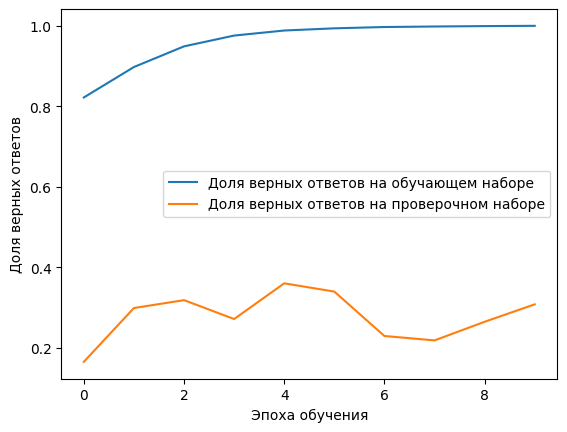

In [ ]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
X_0372='очень вкусный быть ресторан пицца стоить дешево я очень любить это ресторан'
X_0372=pad_sequences(sequences,maxlen=max_news_len)
model_CNN.predict_function

array([[    0,     0,     0, ...,   203,   888,   435],
       [  250,  3416,   155, ...,    93,   545,    63],
       [  514,  2934,   121, ...,  1758,   434,  4941],
       ...,
       [  470,    52,    24, ...,  8996,   774,    28],
       [    0,     0,     0, ...,  1493,  2127,   696],
       [ 3484,  7937,  1420, ..., 90155, 17785,     3]])

# Рекурентная нейронка

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words, 32, input_length=max_news_len))
model_lstm.add(LSTM(25))
model_lstm.add(Dense(5, activation='softmax'))

In [ ]:
model_lstm.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 32)            3200000   
                                                                 
 lstm (LSTM)                 (None, 25)                5800      
                                                                 
 dense_2 (Dense)             (None, 5)                 130       
                                                                 
Total params: 3205930 (12.23 MB)
Trainable params: 3205930 (12.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_lstm = model_lstm.fit(X_train, 
                              y_train, 
                              epochs=5,
                              batch_size=80,
                              validation_split=0.15,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/5
641/642 [============================>.] - ETA: 0s - loss: 0.1939 - accuracy: 0.9363
Epoch 1: val_accuracy improved from 0.23840 to 0.42324, saving model to best_model_lstm.h5
642/642 [==============================] - 9s 14ms/step - loss: 0.1939 - accuracy: 0.9363 - val_loss: 2.8507 - val_accuracy: 0.4232
Epoch 2/5
641/642 [============================>.] - ETA: 0s - loss: 0.1607 - accuracy: 0.9468
Epoch 2: val_accuracy did not improve from 0.42324
642/642 [==============================] - 9s 14ms/step - loss: 0.1606 - accuracy: 0.9468 - val_loss: 4.2547 - val_accuracy: 0.2689
Epoch 3/5
641/642 [============================>.] - ETA: 0s - loss: 0.1256 - accuracy: 0.9602
Epoch 3: val_accuracy did not improve from 0.42324
642/642 [==============================] - 9s 14ms/step - loss: 0.1255 - accuracy: 0.9602 - val_loss: 4.1130 - val_accuracy: 0.3276
Epoch 4/5
640/642 [============================>.] - ETA: 0s - loss: 0.1128 - accuracy: 0.9647
Epoch 4: val_accuracy did not i

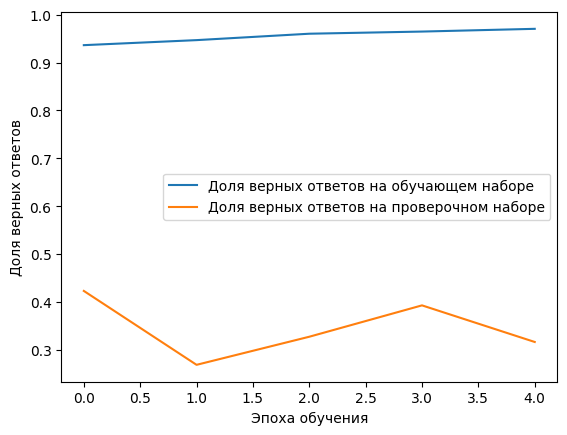

In [ ]:
plt.plot(history_lstm.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(num_words, 32, input_length=max_news_len))
model_gru.add(GRU(25))
model_gru.add(Dense(5, activation='softmax'))

In [ ]:
model_gru.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model_gru.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 40, 32)            3200000   
                                                                 
 gru_2 (GRU)                 (None, 25)                4425      
                                                                 
 dense_24 (Dense)            (None, 5)                 130       
                                                                 
Total params: 3204555 (12.22 MB)
Trainable params: 3204555 (12.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_gru_save_path = 'best_model_gru.h5'
checkpoint_callback_gru = ModelCheckpoint(model_gru_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [ ]:
history_gru = model_gru.fit(X_train, 
                              y_train, 
                              epochs=5,
                              batch_size=300,
                              validation_split=0.1,
                              callbacks=[checkpoint_callback_gru])

Epoch 1/5
180/182 [============================>.] - ETA: 0s - loss: 0.2221 - accuracy: 0.9346
Epoch 1: val_accuracy improved from 0.22300 to 0.23675, saving model to best_model_gru.h5
182/182 [==============================] - 3s 18ms/step - loss: 0.2220 - accuracy: 0.9346 - val_loss: 3.5211 - val_accuracy: 0.2367
Epoch 2/5
181/182 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9465
Epoch 2: val_accuracy improved from 0.23675 to 0.24023, saving model to best_model_gru.h5
182/182 [==============================] - 3s 18ms/step - loss: 0.1881 - accuracy: 0.9465 - val_loss: 3.7165 - val_accuracy: 0.2402
Epoch 3/5
181/182 [============================>.] - ETA: 0s - loss: 0.1700 - accuracy: 0.9520
Epoch 3: val_accuracy did not improve from 0.24023
182/182 [==============================] - 3s 17ms/step - loss: 0.1699 - accuracy: 0.9520 - val_loss: 4.0865 - val_accuracy: 0.2306
Epoch 4/5
182/182 [==============================] - ETA: 0s - loss: 0.1557 - accuracy: 

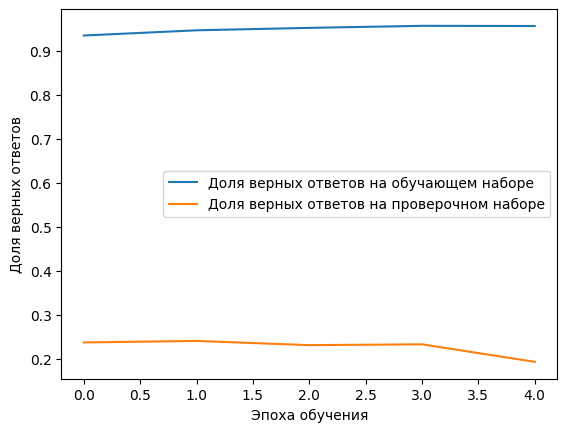

In [ ]:
plt.plot(history_gru.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_gru.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# NEXT UP

In [51]:
data = pd.read_csv('geo-reviews-dataset-2023.tskv',sep='\t',quoting=3)
data.head()

,"address=Екатеринбург, ул. Московская / ул. Волгоградская / ул. Печатников",name_ru=Московский квартал,rating=3.,rubrics=Жилой комплекс,"text=Московский квартал 2.\nШумно : летом по ночам дикие гонки. Грязно : кругом стройки, невозможно открыть окна (16 этаж! ), вечно по району летает мусор. Детские площадки убогие, на большой площади однотипные конструкции. Очень дорогая коммуналка. Часто срабатывает пожарная сигнализация. Жильцы уже не реагируют. В это время, обычно около часа, не работают лифты. Из плюсов - отличная планировка квартир ( Московская 194 ), на мой взгляд. Ремонт от застройщика на 3-. Окна вообще жуть - вместо вентиляции. По соотношению цена/качество - 3."
0,"address=Московская область, Электросталь, прос...",name_ru=Продукты Ермолино,rating=5.,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор..."
1,"address=Краснодар, Прикубанский внутригородско...",name_ru=LimeFit,rating=1.,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,..."
2,"address=Санкт-Петербург, проспект Энгельса, 11...",name_ru=Snow-Express,rating=4.,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...
3,"address=Тверь, Волоколамский проспект, 39",name_ru=Студия Beauty Brow,rating=5.,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...
4,"address=Иркутская область, Черемхово, Первомай...",name_ru=Tele2,rating=5.,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,..."


In [53]:
data.columns=['address','name','rating','rubrics','text']
data.head()

,address,name,rating,rubrics,text
0,"address=Московская область, Электросталь, прос...",name_ru=Продукты Ермолино,rating=5.,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор..."
1,"address=Краснодар, Прикубанский внутригородско...",name_ru=LimeFit,rating=1.,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,..."
2,"address=Санкт-Петербург, проспект Энгельса, 11...",name_ru=Snow-Express,rating=4.,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...
3,"address=Тверь, Волоколамский проспект, 39",name_ru=Студия Beauty Brow,rating=5.,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...
4,"address=Иркутская область, Черемхово, Первомай...",name_ru=Tele2,rating=5.,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,..."


In [54]:
def clean_address(address):

    address_list=address.split('=')
    real_address = address_list[1].split(',')[0]
    return real_address

clean_address=data['address'].apply(clean_address)
clean_address.value_counts()

Москва                                         104774
Санкт-Петербург                                 52568
Московская область                              49953
Краснодарский край                              29646
Республика Татарстан                            11662
                                                ...  
городской округ Луховицы Московская область         1
паромная переправа Оханск - Юго-Камский             1
А-159                                               1
Татарский пролив                                    1
Окситания                                           1
Name: address, Length: 467, dtype: int64

In [55]:
data['Address']=clean_address
data=data.drop(columns='address')
data.head()

,name,rating,rubrics,text,Address
0,name_ru=Продукты Ермолино,rating=5.,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор...",Московская область
1,name_ru=LimeFit,rating=1.,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,...",Краснодар
2,name_ru=Snow-Express,rating=4.,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...,Санкт-Петербург
3,name_ru=Студия Beauty Brow,rating=5.,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...,Тверь
4,name_ru=Tele2,rating=5.,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,...",Иркутская область


In [56]:
def clean_name(name):
    name_list=name.split('=')
    real_name = name_list[1]
    return real_name
clean_name=data['name'].apply(clean_name)
clean_name.value_counts()

Пятёрочка                                 6030
Магнит                                    2611
Красное&Белое                             1732
Wildberries                               1698
Ozon                                      1494
                                          ... 
Клиника доктора Гурбанзаде                   1
Сити Прачка                                  1
Магазин при пивоварне Barbarus Brewery       1
Прайм Карбон                                 1
Ярославское шоссе, 54                        1
Name: name, Length: 148458, dtype: int64

In [57]:
data['Name']=clean_name
data=data.drop(columns='name')
data.head()

,rating,rubrics,text,Address,Name
0,rating=5.,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор...",Московская область,Продукты Ермолино
1,rating=1.,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,...",Краснодар,LimeFit
2,rating=4.,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...,Санкт-Петербург,Snow-Express
3,rating=5.,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...,Тверь,Студия Beauty Brow
4,rating=5.,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,...",Иркутская область,Tele2


In [58]:
data=data.dropna()
data.isnull().value_counts()

rating  rubrics  text   Address  Name 
False   False    False  False    False    499029
dtype: int64

In [59]:
def clean_num(rating):
    rating_list=rating.split('=')
    real_rating = int(float(rating_list[1]))
    if real_rating==0:
        real_rating=1
    return real_rating
clean_name=data['rating'].apply(clean_num)
clean_name.value_counts()

5    389693
4     41116
1     34498
3     21651
2     12071
Name: rating, dtype: int64

In [60]:
data['Rating']=clean_name
data=data.drop(columns='rating')
data.head()

,rubrics,text,Address,Name,Rating
0,rubrics=Магазин продуктов;Продукты глубокой за...,"text=Замечательная сеть магазинов в общем, хор...",Московская область,Продукты Ермолино,5
1,rubrics=Фитнес-клуб,"text=Не знаю смутят ли кого-то данные правила,...",Краснодар,LimeFit,1
2,rubrics=Пункт проката;Прокат велосипедов;Сапсё...,text=Хорошие условия аренды. \nДружелюбный пер...,Санкт-Петербург,Snow-Express,4
3,"rubrics=Салон красоты;Визажисты, стилисты;Сало...",text=Топ мастер Ангелина топ во всех смыслах )...,Тверь,Студия Beauty Brow,5
4,rubrics=Оператор сотовой связи;Интернет-провайдер,"text=Приятное общение, все доступно объяснили,...",Иркутская область,Tele2,5


In [77]:
data[data['Rating']==4]['text'][8]

'text=Не очень удобное расположение, от метро идти мин 20 быстрым шагом через промзону. В самом кофе мест очень мало, а желающих очень много(( пирожные очень вкусные, кофе…бывает вкуснее. Второй раз именно туда на пойду.'

In [78]:
def clean_rub(rubrics):
    rub_list=rubrics.split('=')
    real_rub = str(rub_list[1].split(';')[0])
    if real_rub.lower() == 'магазин продуктов':
        real_rub='Супермаркет'
    if real_rub.lower() == 'кафе':
        real_rub='Ресторан'
    return real_rub
clean_rub=data['rubrics'].apply(clean_rub)
clean_rub.value_counts()

Ресторан                        70935
Гостиница                       42630
Супермаркет                     26178
Салон красоты                   11861
Быстрое питание                  9631
                                ...  
Ремонт оружия                       1
Горнодобывающее оборудование        1
Изготовление витражей               1
Продуктовый автомат                 1
Велотрек, велодром                  1
Name: rubrics, Length: 1251, dtype: int64

In [82]:
clean_rub.value_counts()[:10]

Ресторан                    70935
Гостиница                   42630
Супермаркет                 26178
Салон красоты               11861
Быстрое питание              9631
Торговый центр               8067
Музей                        8050
Бар, паб                     7501
Парк культуры и отдыха       7445
Автосервис, автотехцентр     6191
Name: rubrics, dtype: int64

In [83]:
data['Rubrics']=clean_rub
data=data.drop(columns='rubrics')
data.head()

,text,Address,Name,Rating,Rubrics
0,"text=Замечательная сеть магазинов в общем, хор...",Московская область,Продукты Ермолино,5,Супермаркет
1,"text=Не знаю смутят ли кого-то данные правила,...",Краснодар,LimeFit,1,Фитнес-клуб
2,text=Хорошие условия аренды. \nДружелюбный пер...,Санкт-Петербург,Snow-Express,4,Пункт проката
3,text=Топ мастер Ангелина топ во всех смыслах )...,Тверь,Студия Beauty Brow,5,Салон красоты
4,"text=Приятное общение, все доступно объяснили,...",Иркутская область,Tele2,5,Оператор сотовой связи


In [84]:
def clean_text(text):
    txt_list=text.split('=')
    real_txt = txt_list[1].replace('\n',' ')
    return real_txt
clean_txt=data['text'].apply(clean_text)
data['Text']=clean_txt
data=data.drop(columns='text')
data.head()

,Address,Name,Rating,Rubrics,Text
0,Московская область,Продукты Ермолино,5,Супермаркет,"Замечательная сеть магазинов в общем, хороший ..."
1,Краснодар,LimeFit,1,Фитнес-клуб,"Не знаю смутят ли кого-то данные правила, но я..."
2,Санкт-Петербург,Snow-Express,4,Пункт проката,Хорошие условия аренды. \nДружелюбный персонал...
3,Тверь,Студия Beauty Brow,5,Салон красоты,Топ мастер Ангелина топ во всех смыслах ) Немн...
4,Иркутская область,Tele2,5,Оператор сотовой связи,"Приятное общение, все доступно объяснили, мне ..."


In [85]:
sexy_data=data.copy()
sexy_data.tail()

,Address,Name,Rating,Rubrics,Text
499993,Москва,Бирюлёво-Пассажирская,5,Железнодорожная станция,Хороший способ избежать автобусной пытки. Элек...
499994,Москва,Бирюлёво-Пассажирская,4,Железнодорожная станция,"Охрана кривая но добрая, двери не закрываются ..."
499995,Москва,Бирюлёво-Пассажирская,4,Железнодорожная станция,По сравнению со многими современными платформа...
499997,Астраханская область,Сарай-Бату,5,Достопримечательность,Был с семьёй 13.06.23 Отличное место. Рекоменд...
499998,Астраханская область,Сарай-Бату,5,Достопримечательность,"Отличные декорации... Вблизи тяп-ляп,а на фото..."


In [86]:
nuzshnye=['Ресторан',
'Гостиница',
'Супермаркет',
'Салон красоты',
'Быстрое питание',
'Торговый центр',
'Музей',
'Бар, паб',
'Парк культуры и отдыха',
'Автосервис, автотехцентр']

In [89]:
data_1=sexy_data[(sexy_data['Rubrics'].isin(nuzshnye))]
data_1.head()

,Address,Name,Rating,Rubrics,Text
0,Московская область,Продукты Ермолино,5,Супермаркет,"Замечательная сеть магазинов в общем, хороший ..."
3,Тверь,Студия Beauty Brow,5,Салон красоты,Топ мастер Ангелина топ во всех смыслах ) Немн...
5,Воронежская область,У тещи,4,Ресторан,Глубинка страны во всех своих проявлениях. Асс...
7,Москва,Jinju,5,Ресторан,"5 из 5🖤 Пил кофе и в Риме, и в Париже, но вку..."
8,Москва,Jinju,4,Ресторан,"Не очень удобное расположение, от метро идти м..."


In [105]:
data_for_SNS=data_1['Rubrics'].value_counts()[:5]
data_for_SNS

Ресторан           70935
Гостиница          42630
Супермаркет        26178
Салон красоты      11861
Быстрое питание     9631
Name: Rubrics, dtype: int64

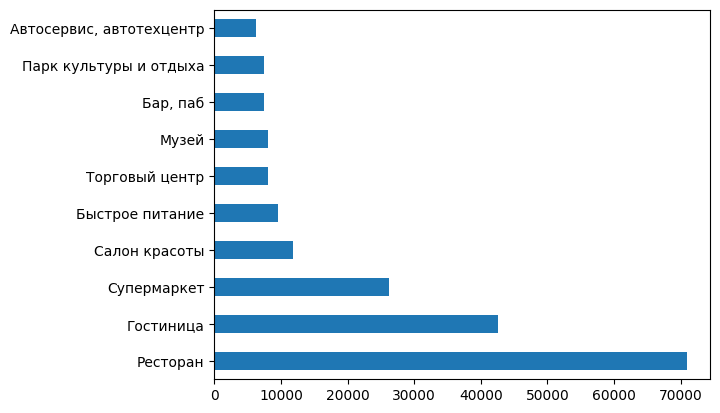

In [108]:
ax = data_1['Rubrics'].value_counts().plot(kind='barh')

In [95]:
count_class_REST, count_class_HOTEL,count_class_SUP,count_class_BEAUTIFULL,count_class_FAST = data_1['Rubrics'].value_counts()[:5]

df_class_REST = data_1[data_1['Rubrics'] == 'Ресторан']
df_class_HOTEL = data_1[data_1['Rubrics'] == 'Гостиница']
df_class_SUP = data_1[data_1['Rubrics'] == 'Супермаркет']
df_class_BEAUTIFULL = data_1[data_1['Rubrics'] == 'Салон красоты']
df_class_FAST = data_1[data_1['Rubrics'] == 'Быстрое питание']

In [98]:
df_class_REST_under = df_class_REST.sample(count_class_FAST)
df_class_HOTEL_under = df_class_HOTEL.sample(count_class_FAST)
df_class_SUP_under = df_class_SUP.sample(count_class_FAST)
df_class_BEAUTIFULL_under = df_class_BEAUTIFULL.sample(count_class_FAST)
df_test_under = pd.concat([df_class_REST_under.reset_index(drop=True),df_class_SUP_under.reset_index(drop=True),df_class_HOTEL_under.reset_index(drop=True),df_class_BEAUTIFULL_under.reset_index(drop=True), df_class_FAST.reset_index(drop=True)], axis=0)

print('Random under-sampling:')
print(df_test_under['Rubrics'].value_counts())

Random under-sampling:
Ресторан           9631
Супермаркет        9631
Гостиница          9631
Салон красоты      9631
Быстрое питание    9631
Name: Rubrics, dtype: int64


In [111]:
df_test_under=df_test_under[['Rubrics','Text']]
df_test_under

,Rubrics,Text
0,Ресторан,Мне очень понравилось!\n\nЕдинственный минус -...
1,Ресторан,"Очень атмосферное место, в которое хочется при..."
2,Ресторан,"Прекрасное заведение, все вкусное, натуральное..."
3,Ресторан,"Максимально атмосферное место. Вкусно, отличны..."
4,Ресторан,"Милая кафешка с приятным обслуживанием, вкусны..."
...,...,...
9626,Быстрое питание,"Хорошое место, перед длительной поездке на авт..."
9627,Быстрое питание,"Расположен на 4 этаже ТРЦ Калейдоскоп, на фудк..."
9628,Быстрое питание,"В целом вкусно, но раньше шаурмист прям большу..."
9629,Быстрое питание,Вкусная шаурма с нереально свежими овощами и в...


In [112]:
df_test_under['Preprocessed_texts'] = df_test_under.apply(lambda row: preprocess(row['Text'], punctuation_marks, stop_words, morph), axis=1)

In [113]:
def simple_text(text):
    stroka=''
    for i in range(len(text)):
        stroka=stroka +text[i]+' '
    return stroka

s1mple=df_test_under['Preprocessed_texts'].apply(simple_text)
s1mple

0       очень понравиться \n\nединственный минус ждать...
1       очень атмосферный место который хотеться прихо...
2       прекрасный заведение вкусный натуральный свежи...
3       максимально атмосферный место вкусно отличный ...
4       милый кафешка приятный обслуживание вкусный на...
                              ...                        
9626    хорошоя место длительный поездка автобус дёшев...
9627    расположить 4 этаж трц калейдоскоп фудкорт сет...
9628    целое вкусно ранний шаурмистый прям больший ша...
9629    вкусный шаурм нереально свежий овощ вкусный мя...
9630    залететь ночью друг разбудить работник сделать...
Name: Preprocessed_texts, Length: 48155, dtype: object

In [114]:
df_test_under['Simple_Text']=s1mple
df_test_under

,Rubrics,Text,Preprocessed_texts,Simple_Text
0,Ресторан,Мне очень понравилось!\n\nЕдинственный минус -...,"[очень, понравиться, \n\nединственный, минус, ...",очень понравиться \n\nединственный минус ждать...
1,Ресторан,"Очень атмосферное место, в которое хочется при...","[очень, атмосферный, место, который, хотеться,...",очень атмосферный место который хотеться прихо...
2,Ресторан,"Прекрасное заведение, все вкусное, натуральное...","[прекрасный, заведение, вкусный, натуральный, ...",прекрасный заведение вкусный натуральный свежи...
3,Ресторан,"Максимально атмосферное место. Вкусно, отличны...","[максимально, атмосферный, место, вкусно, отли...",максимально атмосферный место вкусно отличный ...
4,Ресторан,"Милая кафешка с приятным обслуживанием, вкусны...","[милый, кафешка, приятный, обслуживание, вкусн...",милый кафешка приятный обслуживание вкусный на...
...,...,...,...,...
9626,Быстрое питание,"Хорошое место, перед длительной поездке на авт...","[хорошоя, место, длительный, поездка, автобус,...",хорошоя место длительный поездка автобус дёшев...
9627,Быстрое питание,"Расположен на 4 этаже ТРЦ Калейдоскоп, на фудк...","[расположить, 4, этаж, трц, калейдоскоп, фудко...",расположить 4 этаж трц калейдоскоп фудкорт сет...
9628,Быстрое питание,"В целом вкусно, но раньше шаурмист прям большу...","[целое, вкусно, ранний, шаурмистый, прям, боль...",целое вкусно ранний шаурмистый прям больший ша...
9629,Быстрое питание,Вкусная шаурма с нереально свежими овощами и в...,"[вкусный, шаурм, нереально, свежий, овощ, вкус...",вкусный шаурм нереально свежий овощ вкусный мя...


In [141]:
X_NEW=df_test_under['Simple_Text']
y_new=df_test_under['Rubrics']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_NEW, y_new, test_size=0.25, random_state=42,stratify=y_new)

In [117]:
tfidf=TfidfVectorizer()
tfidf.fit(X_train_new)
X_TRAIN_TFIDF_NEW=tfidf.transform(X_train_new)
X_TEST_TFIDF_NEW=tfidf.transform(X_test_new)
X_TRAIN_TFIDF_NEW

<36116x44735 sparse matrix of type '<class 'numpy.float64'>'
	with 982138 stored elements in Compressed Sparse Row format>

# Я СКАЗАЛА СТАРТУЕМ Х2!

In [118]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_TRAIN_TFIDF_NEW, y_train_new)

DecisionTreeClassifier()

In [119]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_TRAIN_TFIDF_NEW,y_train_new)

MultinomialNB()

In [120]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_TRAIN_TFIDF_NEW,y_train_new)

C:\Users\BAZA PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [133]:
from  sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors = 27, metric = 'euclidean')
KNC.fit(X_TRAIN_TFIDF_NEW,y_train_new)

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

In [122]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=80)
RFC.fit(X_TRAIN_TFIDF_NEW,y_train_new)

RandomForestClassifier(n_estimators=80)

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=85)
GBC.fit(X_TRAIN_TFIDF_NEW,y_train_new)

GradientBoostingClassifier(n_estimators=85)

# НА ОЦЕНОЧКУ Х2!

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
def report(model):
    preds = model.predict(X_TEST_TFIDF_NEW)
    print(classification_report(y_test_new,preds))
    ConfusionMatrixDisplay.from_estimator(model,X_TEST_TFIDF_NEW,y_test_new)

MNB
                 precision    recall  f1-score   support

Быстрое питание       0.83      0.75      0.79      2408
      Гостиница       0.89      0.95      0.92      2407
       Ресторан       0.78      0.81      0.79      2408
  Салон красоты       0.98      0.99      0.98      2408
    Супермаркет       0.95      0.93      0.94      2408

       accuracy                           0.89     12039
      macro avg       0.89      0.89      0.88     12039
   weighted avg       0.89      0.89      0.88     12039



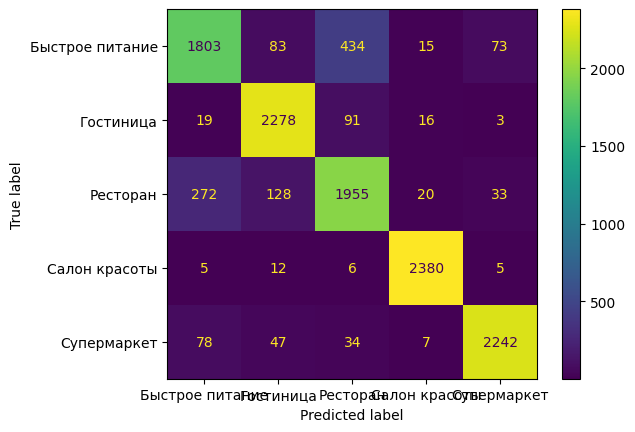

In [125]:
print("MNB")
report(MNB)

DTC
                 precision    recall  f1-score   support

Быстрое питание       0.67      0.67      0.67      2408
      Гостиница       0.88      0.85      0.87      2407
       Ресторан       0.66      0.68      0.67      2408
  Салон красоты       0.95      0.96      0.96      2408
    Супермаркет       0.90      0.91      0.90      2408

       accuracy                           0.81     12039
      macro avg       0.81      0.81      0.81     12039
   weighted avg       0.81      0.81      0.81     12039



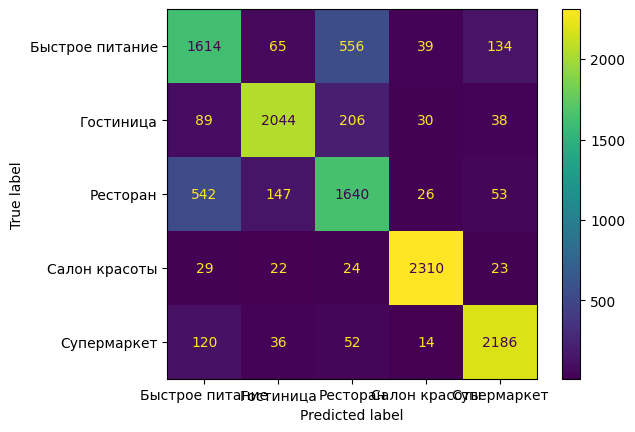

In [126]:
print("DTC")
report(dtc)

KNC
                 precision    recall  f1-score   support

Быстрое питание       0.74      0.75      0.75      2408
      Гостиница       0.96      0.84      0.90      2407
       Ресторан       0.78      0.69      0.73      2408
  Салон красоты       0.97      0.97      0.97      2408
    Супермаркет       0.79      0.96      0.86      2408

       accuracy                           0.84     12039
      macro avg       0.85      0.84      0.84     12039
   weighted avg       0.85      0.84      0.84     12039



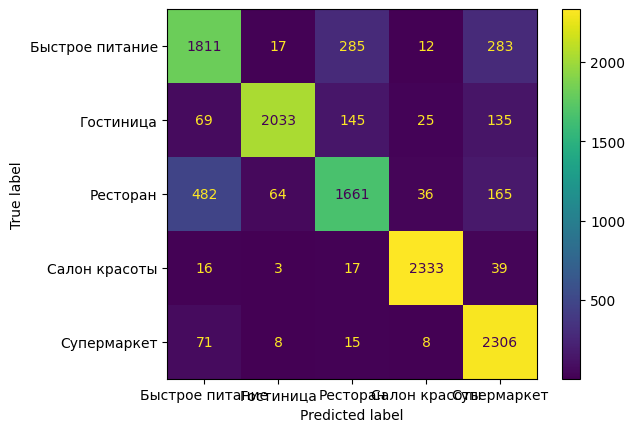

In [134]:
# K=27 metric = euclidean
print("KNC")
report(KNC)

SVC
                 precision    recall  f1-score   support

Быстрое питание       0.81      0.80      0.80      2408
      Гостиница       0.95      0.93      0.94      2407
       Ресторан       0.79      0.82      0.80      2408
  Салон красоты       0.99      0.99      0.99      2408
    Супермаркет       0.95      0.94      0.94      2408

       accuracy                           0.90     12039
      macro avg       0.90      0.90      0.90     12039
   weighted avg       0.90      0.90      0.90     12039



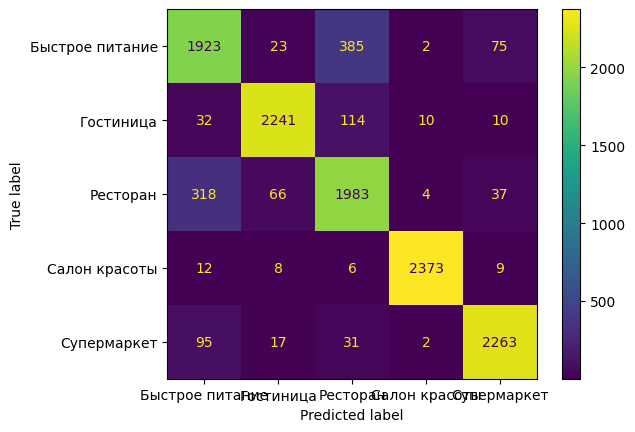

In [128]:
print('SVC')
report(svc)

RFC
                 precision    recall  f1-score   support

Быстрое питание       0.79      0.77      0.78      2408
      Гостиница       0.94      0.92      0.93      2407
       Ресторан       0.78      0.79      0.78      2408
  Салон красоты       0.98      0.98      0.98      2408
    Супермаркет       0.92      0.95      0.94      2408

       accuracy                           0.88     12039
      macro avg       0.88      0.88      0.88     12039
   weighted avg       0.88      0.88      0.88     12039



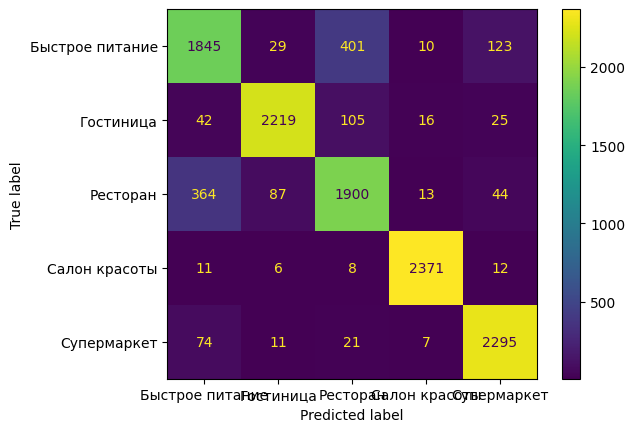

In [129]:
print('RFC')
report(RFC)

GBC
                 precision    recall  f1-score   support

Быстрое питание       0.69      0.78      0.73      2408
      Гостиница       0.95      0.88      0.92      2407
       Ресторан       0.76      0.79      0.77      2408
  Салон красоты       0.99      0.95      0.97      2408
    Супермаркет       0.94      0.90      0.92      2408

       accuracy                           0.86     12039
      macro avg       0.87      0.86      0.86     12039
   weighted avg       0.87      0.86      0.86     12039



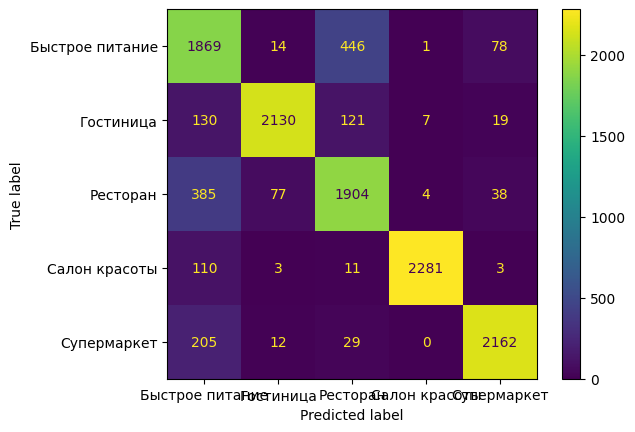

In [130]:
print('GBC')
report(GBC)

# НЕЙРОНКИ СУКА МОГУТ!

In [135]:
#%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [144]:
# Максимальное количество слов 
num_words = 100000
# Максимальная длина новости
max_news_len = 40
# Количество классов новостей
nb_classes = 5
X_NEW=df_test_under['Simple_Text']
y_new=df_test_under['Rubrics']

In [162]:
# ХЗ ХЗ Если что разбить на utils y_new
def chisla_is_back(classes):
    G_class=['Ресторан','Салон красоты','Быстрое питание','Гостиница','Супермаркет']
    for i in range(1,6):
        if G_class[i-1]==classes:
            return i-1
G_class=y_new.apply(chisla_is_back)
y_new['class']=G_class
y_train = utils.to_categorical(y_new['class'] - 1, nb_classes)

In [164]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [167]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_NEW, y_train, test_size=0.2, random_state=42,stratify=y_train)

In [168]:
tokenizer=Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_NEW)

In [169]:
tokenizer.index_word

{1: 'очень',
 2: 'хороший',
 3: 'персонал',
 4: 'это',
 5: 'вкусный',
 6: 'место',
 7: 'номер',
 8: 'мастер',
 9: 'магазин',
 10: 'отличный',
 11: 'n',
 12: 'салон',
 13: 'цена',
 14: 'вкусно',
 15: 'всё',
 16: 'отель',
 17: 'приятный',
 18: 'вежливый',
 19: 'рекомендовать',
 20: 'уютный',
 21: 'спасибо',
 22: 'понравиться',
 23: 'большой',
 24: 'весь',
 25: 'чисто',
 26: 'еда',
 27: 'свой',
 28: 'который',
 29: 'просто',
 30: 'выбор',
 31: 'день',
 32: 'обслуживание',
 33: 'товар',
 34: 'приветливый',
 35: 'быстро',
 36: 'ресторан',
 37: 'время',
 38: 'блюдо',
 39: 'такой',
 40: 'чистый',
 41: 'заведение',
 42: 'делать',
 43: 'ходить',
 44: 'сделать',
 45: 'завтрак',
 46: 'прекрасный',
 47: 'удобный',
 48: 'качество',
 49: 'свежий',
 50: 'самый',
 51: 'работать',
 52: 'кухня',
 53: 'атмосфера',
 54: 'ребёнок',
 55: 'один',
 56: 'ещё',
 57: 'работа',
 58: "''",
 59: 'человек',
 60: 'кофе',
 61: 'рядом',
 62: 'год',
 63: 'первый',
 64: 'кафе',
 65: 'заказ',
 66: 'хотеть',
 67: 'маникюр'

In [170]:
sequences=tokenizer.texts_to_sequences(X_NEW)

In [171]:
X_train=pad_sequences(sequences,maxlen=max_news_len)

# СВЕРТОЧНАЯ НА БАЗЕ

In [180]:
model_CNN=Sequential()
model_CNN.add(Embedding(num_words, 32, input_length=max_news_len))
model_CNN.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dense(5, activation='softmax'))

In [181]:
model_CNN.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [182]:
model_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 32)            3200000   
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 250)           40250     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 250)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 128)               32128     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 3273023 (12.49 MB)
Trainable params: 3273023 (12.49 MB)
Non-trainable params: 0 (0.00 Byte)
______________

In [183]:
model_cnn_save_path = 'best_model_cnn_for_classes.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [184]:
history_cnn = model_CNN.fit(X_train, 
                            y_train,
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
338/339 [============================>.] - ETA: 0s - loss: 0.5174 - accuracy: 0.8109
Epoch 1: val_accuracy improved from -inf to 0.61337, saving model to best_model_cnn_for_classes.h5
339/339 [==============================] - 5s 14ms/step - loss: 0.5170 - accuracy: 0.8111 - val_loss: 0.8957 - val_accuracy: 0.6134
Epoch 2/5
337/339 [============================>.] - ETA: 0s - loss: 0.2110 - accuracy: 0.9284
Epoch 2: val_accuracy improved from 0.61337 to 0.69311, saving model to best_model_cnn_for_classes.h5
339/339 [==============================] - 5s 14ms/step - loss: 0.2110 - accuracy: 0.9284 - val_loss: 0.7780 - val_accuracy: 0.6931
Epoch 3/5
339/339 [==============================] - ETA: 0s - loss: 0.1278 - accuracy: 0.9603
Epoch 3: val_accuracy improved from 0.69311 to 0.76474, saving model to best_model_cnn_for_classes.h5
339/339 [==============================] - 5s 13ms/step - loss: 0.1278 - accuracy: 0.9603 - val_loss: 0.6922 - val_accuracy: 0.7647
Epoch 4/5
339/33

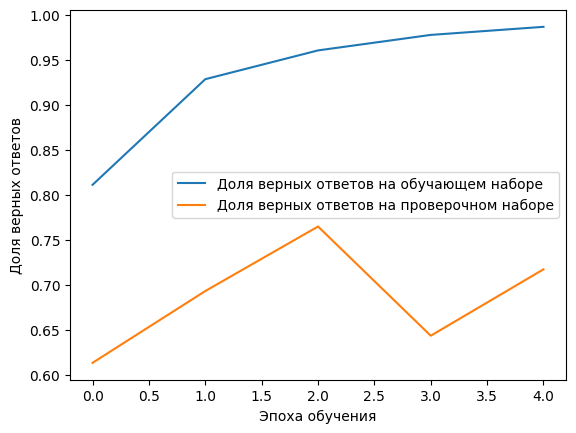

In [185]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()